# Backpropagation in Neural Networks

The task we need to accomplish consists in recognizing handwritten digits (0 to 9).

In this notebook we will implement the whole Neural Network algorithm, hence **Feed Forward Propagation** (defining the relation between predictors and output) plus **Back Propagation**.

In the previous notebook we implemented just the *Feed Forward Propagation* step using pre-trained weights.<br>
In this notebook instead we will learn how to learn these weights.

Here we start with some theory notions first.

Let's represent again how the *Forward Propagation* step is computed in the Neural Network:
<img src="img/NN.png" alt="Neural Network representation" style="width: 400px;"/>


Let's define some variables first:
1. $L$ = number of layers
2. $s_l$ = number of neurons (nodes) in the $l_{th}$ layer not counting the bias unit
3. $K$ = number of classes, $S_L = K$
4. $m$ = number of data points (row) in the training set
5. $n$ = number of features (columns in the training sets)

Second, let's recall the cost function for Logistic Regression:

$J(\theta) = \frac{1}{m}\sum_{i=1}^m(-y^{(i)} log(h^{(i)}(\theta)) - (1-y^{(i)})log(1-h^{(i)}(\theta))) + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$

## Cost Function

The cost for the NN is going to be just a more complicated version of the above:

$J(\Theta) = \frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K\big[-y_k^{(i)} log((h_{\Theta}(x^{(i)}))_k) - (1-y_k^{(i)})log(1-(h_{\Theta}(x^{(i)}))_k)\big] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_l + 1}(\Theta_{i,j}^{(l)})^2$

where $h_{\theta}(x^{(i)})$ is computed as shown in the Figure 2 above, and $K$ = 10 is the total number of possible labels. <br>
Note that $h_{\theta}(x^{(i)})_k = a_k^{(3)}$ is the activation function (output value) of the *k*-th output unit (in the output layer) for the *i*-th training example.

We want to find $\Theta$ to minimize $J(\Theta)$.

To do that, we need to calculate $\nabla J(\Theta)$ w.r.t. (with respect to) to $\Theta$, basically $\frac{\partial J(\Theta)}{\partial \Theta_{i,j}^{(l)}} = D_{i,j}^{(l)}$. <br>
The **backpropagation algorithm** helps us to calculate $D_{i,j}^{(l)}$.

## Backpropagation Algorithm

**NOTE**: we are going to explain how the backpropagation algorithm works taking into account that our Neural Network has **3 layers** (one input layer, one hidden layer and one output layer) where the input layer has **400** units (excluding bias term), the hidden layer has **25** units (excluding bias term) and the output layer has **10** units.

1. $\Delta^{(l)} := 0$, define a gradient matrix $\Delta$ for each layer, excluding the input layer (so do not define $\Delta^{(0)}$) and set its values to zero. Concretely, in our case we will define $\Delta^{(2)}$ and $\Delta^{(1)}$. The size of $\Delta^{(l)}$ is euqual to:
$$ size(\Delta^{(l)}) = size(\theta^{(l)})$$
These $\Delta^{(l)}$ matrix will be used to store the gradient of the cost function.


2. For $i = 1:m$ (looping through the training set): <br>
   A- set the input layer's values ($a^{(1)}$) to the $t$-th trainig example $x^{(t)}$. <br>
   
   B- perform a **feed forward propagation** pass (Figure 2), computing the activations ($z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)}$) for layers 2 and 3. Note that you need to add $+1$ term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit. <br>
   
   C- Then, for each node $j$ in layer $l$, we would like to compute an "error term" $\delta_j^{(l)}$ that measures *how much that node was "responsible" for any errors in our output"*. For each output unit $k$ in layer 3 (the output layer), set:
   $$\delta_k^{(3)} = (a_k^{(3)} - y_k)$$ where $y_k \in \{0, 1\}$ indicates whether the current training example belongs to class $k$ ($y_k = 1$), or if it belongs to a different class ($y_k = 0$). <br>
   
   D- for hidden layer $l = 2$, set:
   $$\delta^{(2)} = (\theta^{(2)})^T \delta^{(3)}.* g'(z^{(2)}) = (\theta^{(2)})^T \delta^{(3)}.* ((a^{(2)}).*(1-a^{(2)}))$$
   Note: in the upper formula you have to ignore the fist column of Theta2 which represents the bias term. <br>
   For the **input unit** we do not compute the error term. (Note that $".*"$ indicates normal multiplication and not matrix multiplication). <br>
   
   E- Accumulate the gradient using the following formula: 
   $$\Delta^{(l)} = \Delta^{(l)} + \delta^{(l + 1)}(a^{(l)})^T $$
   So, in our case, we have calculted so far $\delta^{(3)}$, $\delta^{(2)}$ and we have $\Delta^{(2)}$ and $\Delta^{(1)}$ which we have previously initialized. Then the updates of $\Delta^{(2)}$ and $\Delta^{(1)}$ are:
   $$\Delta^{(2)} = \Delta^{(2)} + \delta^{(3)}(a^{(2)})^T $$
   $$\Delta^{(1)} = \Delta^{(1)} + \delta^{(2)}(a^{(1)})^T $$


3. Obtain the regularized gradient for the Neural Network cost function by dividing the accumulated gradients by $\frac{1}{m}$:

$\frac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta)= D_{i,j}^{(l)} = \frac{1}{m}\Delta_{i, j}^{(l)}$ for $j = 0$ <br>

$\frac{\partial}{\partial \Theta_{i,j}^{(l)}} J(\Theta)= D_{i,j}^{(l)} = \frac{1}{m}\Delta_{i, j}^{(l)} + \frac{\lambda}{m} \theta_{i, j}^{(l)}$ for $j \geq 1$

In the following picture is depicted how the *error terms* are computed in backpropagation algorithm.

<img src="img/backpropNN.png" alt="Backpropagation Neural Network representation" style="width: 400px;"/>

## Training - Learning parameters $\theta$

So now we know how to implement the Neural Network cost function and its gradient computation. Then, in order to train our NN, namely learn the $\theta$ parameters, we can use some optimization algorithm to find a set of $\theta$ parameters which minimize our cost function.

**Let's implement it!**

In [88]:
import scipy.io as sio
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

## Functions

In [84]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoidGradient(z):
    return sigmoid(z)*(1 -sigmoid(z))

def backPropagationNNCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd):
    Theta1 = nn_params[0:((input_layer_size + 1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size + 1)
   
    m = X.shape[0]
    J = 0
    
    # need to recode y
    y_recoded = np.zeros((y.shape[0], num_labels))
    for i in range(y.shape[0]):
        y_recoded[i, y[i, 0]-1] = 1
    
    # add bias column to X
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    # feed forward propagation for each training example
    for i in range(m):
        a1 = X[i, :].reshape(-1, 1).T #1, 401
        a2 = sigmoid((np.dot(Theta1, a1.T))).reshape(-1, 1).T #(1, 25)
        a2 = np.c_[np.ones((a2.shape[0], 1)), a2] #(1, 26)
        h = sigmoid((np.dot(Theta2, a2.T))).reshape(-1, 1).T #(1, 10)
        # compute cost function
        J = J + (1/m)*((np.dot(-y_recoded[i, :], np.log(h.T))) - (np.dot(1 - y_recoded[i, :], np.log(1 - h.T)))) 
    
    #add regularization
    J = J + (lamd/(2*m))*((sum(sum(Theta1[:, 1:]**2))) + (sum(sum(Theta2[:, 1:]**2))))
    return np.asscalar(J.squeeze())
    
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    return np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

def backPropagationGradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd):
    Theta1 = nn_params[0:((input_layer_size + 1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size + 1)
    # Theta1 (25, 401)
    # Theta2 (10, 26)
    m = X.shape[0]
    
    # need to recode y
    y_recoded = np.zeros((y.shape[0], num_labels)) # (5000,10)
    for i in range(y.shape[0]):
        y_recoded[i, y[i]-1] = 1
    
    # add bias column to X
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    # initialize gradient matrix
    Theta1_grad = np.zeros((Theta1.shape[0], Theta1.shape[1])) # (25, 401)
    Theta2_grad = np.zeros((Theta2.shape[0], Theta2.shape[1])) # (10, 26)
    
    for i in range(m):
        # feed forward propagation
        a1 = X[i, :].reshape(-1, 1).T #1, 401
        a2 = sigmoid((np.dot(Theta1, a1.T))).reshape(-1, 1).T #(1, 25)
        a2 = np.c_[np.ones((a2.shape[0], 1)), a2] #(1, 26)
        h = sigmoid((np.dot(Theta2, a2.T))).reshape(-1, 1).T #(1, 10)
        
        delta_3 = h - y_recoded[i, :] #(1, 10)
        delta_2 = np.dot(Theta2[:, 1:].T, delta_3.T)*sigmoidGradient(np.dot(Theta1, a1.T)) #
        
        Theta2_grad = Theta2_grad + np.dot(delta_3.T, a2) #
        Theta1_grad = Theta1_grad + np.dot(delta_2, a1) #(25, 1)*(1, 401)
    
    # put bias column to zero because we do not have to regularize it
    Theta1[:, 0] = 0
    Theta2[:, 0] = 0
    
    Theta1_grad = (1/m)*Theta1_grad + (lamd/m)*Theta1
    Theta2_grad = (1/m)*Theta2_grad + (lamd/m)*Theta2
    
    grad = np.vstack((Theta1_grad.reshape(Theta1_grad.size, 1), Theta2_grad.reshape(Theta2_grad.size, 1)))
    return grad.flatten()



def forwardPropagationPredictions(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    # value to return
    predictions = np.zeros((m, 1)) #50, 1
    # add bias therm for first layer
    a1 = np.c_[np.ones((m, 1)), X] #50, 401
    
    # calculate a2 using sigmoid function
    a2 = sigmoid(Theta1.dot(a1.T)).T # 50, 25
    # add bias therm for second layer
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2] #50, 26
    
    # calculate output (h == a3)
    h = sigmoid(a2.dot(Theta2.T)) # 50, 10 
    
    # calculate prediction choosing the index of max argument for each row
    predictions = np.argmax(h, axis=1) + 1
    
    return predictions


def checkNNGradients(lamb):
    input_layer_size = 400
    hidden_layer_size = 5
    num_labels = 10
    m = 5
    
    # We generate some 'random' test data
    Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
    Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
    nn_params = np.vstack((Theta1.reshape(Theta1.size, 1), Theta2.reshape(Theta2.size, 1)))
    
    # Reusing debugInitializeWeights to generate X
    #X  = debugInitializeWeights(m, input_layer_size - 1)
    #y  = (1 + np.mod(np.arange(m)+1, num_labels).T).reshape(-1, 1) 
    
    data = sio.loadmat('ex4data1.mat')
    X = data['X']
    y = data['y']
    X = X[0:10, :]
    y = y[0:10, :]
   
    
    grad = backPropagationGradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)
    num_grad = computeNumericalGradient(backPropagationNNCostFunction, nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)
    
    return grad, num_grad
    
def computeNumericalGradient(J, nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd):
    num_grad = np.zeros((nn_params.shape[0], 1))
    epsilon_vector = np.zeros((nn_params.shape[0], 1))
    e = np.exp(-4)
    for i in range(nn_params.shape[0]):
        epsilon_vector[i] = e
        loss1 = J(nn_params - epsilon_vector, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)
        loss2 = J(nn_params + epsilon_vector, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)
        num_grad[i] = (loss2 - loss1) / (2*np.e)
        epsilon_vector[i] = 0
    return num_grad


def debugInitializeWeights(hidden_layer_size, input_layer_size):
    W = np.zeros((hidden_layer_size, input_layer_size + 1))
    
    # Initialize W using "sin", this ensures that W is always of the same
    # values and will be useful for debugging
    W = np.sin(np.arange(W.size)+1).reshape(W.shape[0], W.shape[1]) / 10
    
    return W

### Calculate NN cost funcion with pre-trained weights

In [98]:
# setup the parameters you will use for this exercise
input_layer_size  = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

data = sio.loadmat('ex4data1.mat')
X = data['X']
y = data['y']
data = sio.loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
a = Theta1[:, :].reshape(-1, 1)
b = Theta2[:, :].reshape(-1, 1)
# unrolling of parameters
nn_params = np.append(a, b).reshape(-1, 1)

In [99]:
# calculating un-regularized cost for the Neural Network
lamd = 0
cost = backPropagationNNCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)
print("Cost for the pre-trained Neural Network without regularization (lambda = 0): ", cost)

Cost for the pre-trained Neural Network without regularization (lambda = 0):  0.2876291651613187


In [100]:
# calculating regularized cost for the Neural Network
lamd = 1
cost = backPropagationNNCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)
print("Cost for the pre-trained Neural Network with regularization (lambda = 1): ", cost)

Cost for the pre-trained Neural Network with regularization (lambda = 1):  0.3837698590909234


### Checking gradient implementation

After we have implemented our gradient computation, how do we know if it right? <br>
In our specific case, we want to know if our *backPropagationGradient* actually works well, namely, it calculte the right gradients of the cost funcion *backPropagationNNCostFunction*.

In our neural network, we are minimizing the cost function $J(\Theta)$. To perform gradient checking on our parameters, we can imagine "unrolling" the parameters $\Theta^{(1)}$, $\Theta^{(2)}$ into a long vector $\theta$. By doing so, we can think of
the cost function being $J(\theta)$ instead and use the following gradient checking procedure.

Suppose we have a function $f_i(\theta)$ that purportedly computes $\frac{\partial J(\Theta)}{\partial \theta_{i}}$; we'd like to check if $f_i$ is outputting correct derivative values.

Let $\theta^{(i+)} = \theta + \begin{bmatrix} 0 \\0 \\ \vdots \\ \epsilon \\ \vdots \\0 \\0 \end{bmatrix}$ and $\theta^{(i-)} = \theta - \begin{bmatrix} 0 \\0 \\ \vdots \\ \epsilon \\ \vdots \\0 \\0 \end{bmatrix}$

So, $\theta^{(i+)}$ is the same as $\theta$, except its $i$-th element has been incremented by $\epsilon$. Similarly, $\theta^{(i-)}$  is the corresponding vector with the $i-th$ element decreased by $\epsilon$. We can now numerically verify $f_i(\theta)$'s correctness by checking, for each $i$, that:
$$f_i(\theta) \approx \frac{J(\theta^{(i+)}) - J(\theta^{(i-)})}{2\epsilon}$$

The degree to which these two values should approximate each other will depend on the details of $J$. But assuming $\epsilon = 10^{-4} $, we'll usually find that the left- and right-hand sides of the above will agree to at least 4 significant digits (and often many more). If our backpropagation implementation is correct, we should see a relative difference that is less than $10^{-9}$.

In [72]:
from scipy.optimize import check_grad
#check_grad(backPropagationNNCostFunction, backPropagationGradient , nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamd)

## Training Neural Network

### Initializing Neural Network weights

A very important step before even start running any optimization algortithm is to randomly intialize the matrices of weights to be learnt for symmetry breaking. An effective strategy is to select values for $\Theta^{(l)}$ which are uniformly distributed in the range $[-\epsilon^{(l)}_{init}, \epsilon^{(l)}_{init}]$

A good choice of $\epsilon^{(l)}_{init}$ is $\epsilon^{(l)}_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$ where $L_{in} = s_l$ and $L_{out} = s_{l+1}$ are the number of units in the layers adjacent to $\theta^{(l)}$.

In [105]:
import time

input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
#unrolling parameters 
nn_params = np.append(initial_Theta1, initial_Theta2).reshape(-1, 1)  

mat = sio.loadmat('ex4data1.mat')
X = mat['X']
y = mat['y']

start = time.time()

lamb = 0
opt_results = scipy.optimize.fmin_cg(f=backPropagationNNCostFunction, x0=nn_params.squeeze(), 
                                     args=(input_layer_size, hidden_layer_size, num_labels, X, y, lamb),
                                     fprime=backPropagationGradient, disp=True, full_output=True, retall=True)

end = time.time()

Optimization terminated successfully.
         Current function value: 0.000529
         Iterations: 236
         Function evaluations: 807
         Gradient evaluations: 807


In [107]:
total = end-start
print("NN Training executed in", round(total/60, 2), "minutes")

NN Training executed in 10.47 minutes


### Compute predictions through Feed Forward Propagation

In [108]:
optimized_nn_weights = opt_results[0]
Theta1 = optimized_nn_weights[0:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
Theta2 = optimized_nn_weights[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)

# feed forward propagation
predictions = forwardPropagationPredictions(Theta1, Theta2, X)
accuracy = (y == predictions.reshape(-1,1)).mean()*100

print('NN Accuracy: {0}%'.format(round(accuracy, 2)))

NN Accuracy: 100.0%


Notice that we got 100% of accuracy beacuse we set $\lambda$ to zero, so we are probably overfitting the data. Furthermore we tested out our model on the training set. We should instead use cross validation set and then test set. 

In [117]:
def displayPredictions(X, y, predictions):
    fig = plt.figure(figsize=(9,9))
    plt.title('100 Random Images; NN predictions in Red; Actuals in Blue', y=1.04)
    indexes = random.sample(range(1, X.shape[0]), 100)
    images = X[indexes,:]
    pred = predictions[indexes]
    actuals = y[indexes]
    for i in np.arange(10):
        for j in np.arange(10):
            ax = fig.add_subplot(10, 10, (10*j+i)+1)
            ax.matshow(images[10*j+i,:].reshape(20,20), cmap = 'gray')
            ax.annotate(pred[10*j+i], xy=(2, 1), color='r', weight='bold', size=14,
                        horizontalalignment='right', verticalalignment='bottom')
            ax.annotate(actuals[10*j+i][0], xy=(11, 1), color='b', weight='bold', size=14,
                        horizontalalignment='right', verticalalignment='bottom')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.tight_layout()
    plt.show()

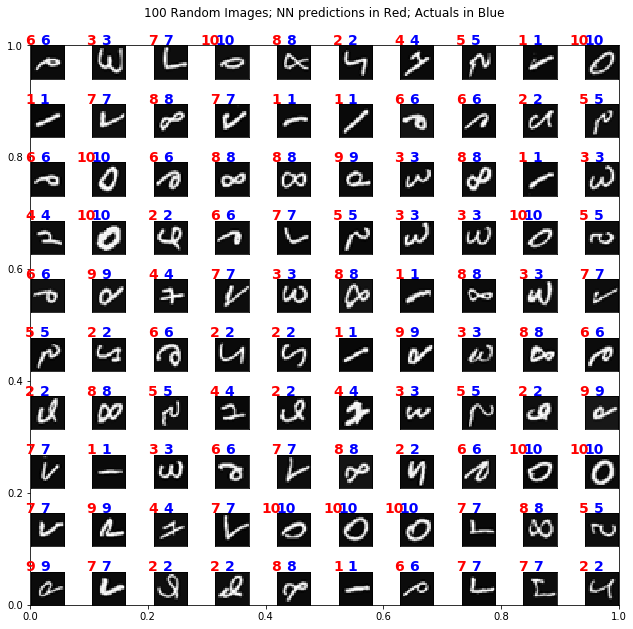

In [118]:
displayPredictions(X, y, predictions)

## Visualizing the hidden layer

One way to understand what your neural network is learning is to visualize what are the representations captured by the hidden units. For the neural network we trained, notice that the $i$-th row of $\theta^{(1)}$ is a 401-dimensional vector that represents the parameter for the $i$-th hidden unit. Thus, to visualize the "representation" captured by the hidden units, we discard the bias term getting a 400 dimensional vector. Then reshape this 400 dimensional vector into $20 \times 20$ image and display it. The result is shown below in an image with 25 units, each corresponding to one hidden unit in the network.

In [106]:
def displayHiddenLayerWeight(X):
    fig = plt.figure(figsize=(8,8))
    square = int(np.sqrt(X.shape[0]))
    square_dim = int(np.sqrt(X.shape[1]))
    plt.title('Visualization of the feature captured by the Hidden Layer')
    for i in np.arange(square):
        for j in np.arange(square):
            ax = fig.add_subplot(square, square, (square*j+i)+1)
            ax.matshow(X[square*j+i,:].reshape(square_dim, square_dim), cmap = 'gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

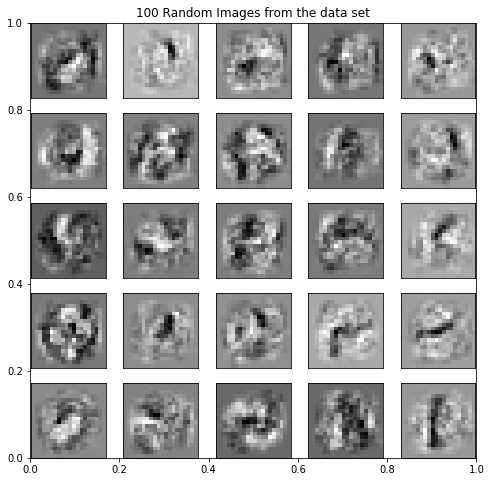

In [62]:
displayHiddenLayerWeight(Theta1[:, 1:])

In your trained network, you should find that the hidden units corresponds roughly to **detectors** that look for strokes and other patterns in the input.